In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [41]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [40]:
pip install dpcpp-cpp-rt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
data=pd.read_csv('diamonds.csv')

# Data Definition

In [6]:
data.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [7]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64

# EDA

In [8]:
data['cut'].value_counts()

b'Ideal'        21551
b'Premium'      13791
b'Very Good'    12082
b'Good'          4906
b'Fair'          1610
Name: cut, dtype: int64

In [9]:
data['color'].value_counts()

b'G'    11292
b'E'     9797
b'F'     9542
b'H'     8304
b'D'     6775
b'I'     5422
b'J'     2808
Name: color, dtype: int64

In [10]:
data['clarity'].value_counts()

b'SI1'     13065
b'VS2'     12258
b'SI2'      9194
b'VS1'      8171
b'VVS2'     5066
b'VVS1'     3655
b'IF'       1790
b'I1'        741
Name: clarity, dtype: int64

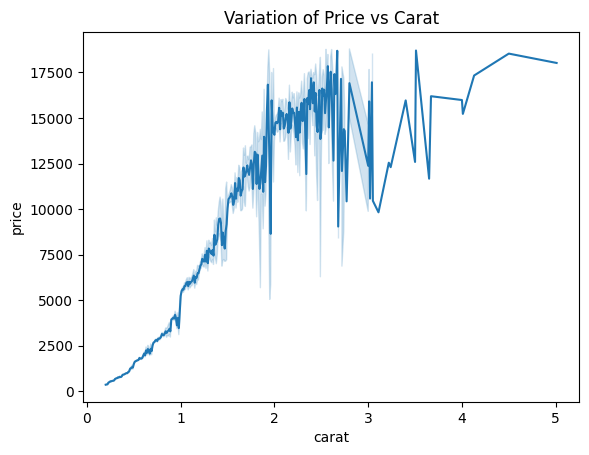

In [11]:
sns.lineplot(x= 'carat', y= 'price', data= data)
plt.title('Variation of Price vs Carat')
plt.show()

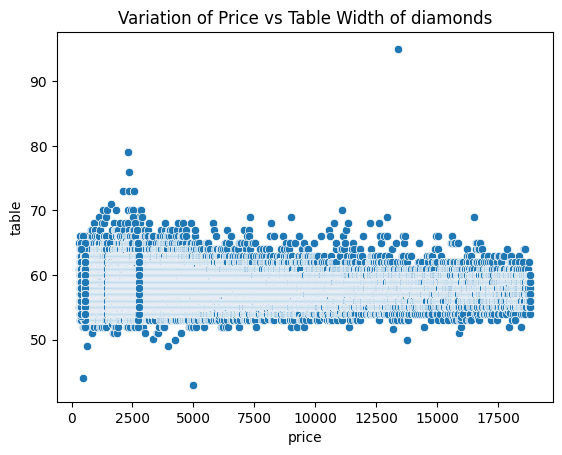

In [12]:
sns.scatterplot(y= 'table', x= 'price', data= data)
plt.title('Variation of Price vs Table Width of diamonds')
plt.show()

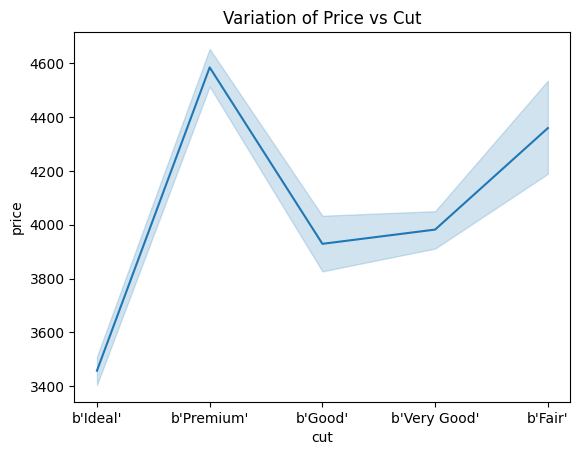

In [13]:
sns.lineplot(x= 'cut', y= 'price', data= data)
plt.title('Variation of Price vs Cut')
plt.show()

# Data Pre Processing

In [21]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [29]:
from sklearnex import patch_sklearn
patch_sklearn()
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression R2 score:", lr_r2, "MSE:", lr_mse)

Linear Regression R2 score: 0.9189331350419419 MSE: 1288705.4778516258


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Decision Tree Algorithm

In [30]:
from sklearnex import patch_sklearn
patch_sklearn()
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_r2 = r2_score(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
print("Decision Tree Regression R2 score:", dtr_r2, "MSE:", dtr_mse)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Decision Tree Regression R2 score: 0.9553648883838335 MSE: 709556.3998192436


# Random Forest Regressor

In [36]:
from sklearnex import patch_sklearn
patch_sklearn()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_r2 = r2_score(y_test, rfr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)
print("Random Forest Regression R2 score:", rfr_r2, "MSE:", rfr_mse)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Random Forest Regression R2 score: 0.9744981137520105 MSE: 405398.9323546229


# SVR

In [34]:
from sklearnex.svm import SVR
from sklearnex import patch_sklearn
patch_sklearn()
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
print("Support Vector Regression R2 score:", svr_r2, "MSE:", svr_mse)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Support Vector Regression R2 score: 0.8039604324299826 MSE: 3116406.0030427114


In [35]:
from sklearnex import patch_sklearn
patch_sklearn()
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)
print("Gradient Boosting Regression R2 score:", gbr_r2, "MSE:", gbr_mse)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Gradient Boosting Regression R2 score: 0.954965352234254 MSE: 715907.7546524308


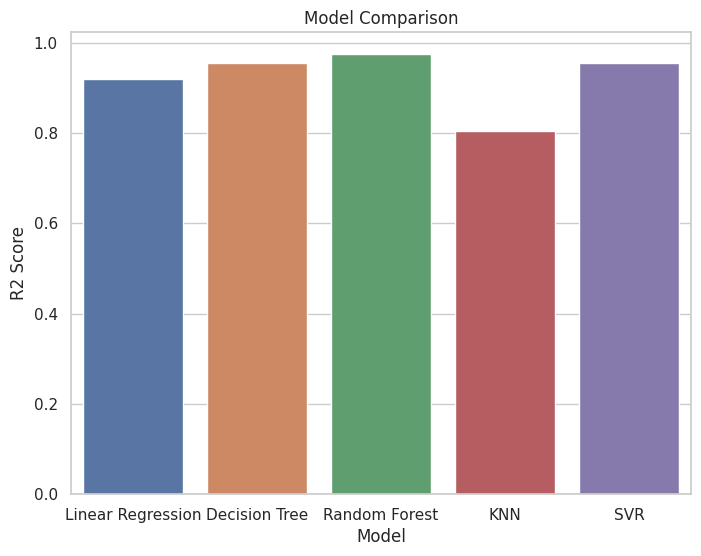

In [28]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVR']
accuracies = [lr_r2, dtr_r2, rfr_r2, svr_r2, gbr_r2]
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()


# Conclusion

The Random Forest Model is the most efficient as it has the highest R2 score compared to other models. Therefore, let us consider this the ideal model for predicting the price of a given Diamond.

# Prediction

In [ ]:
carat = float(input("Enter carat value (0.2 - 5.01): "))
cut = input("Enter cut (Fair, Good, Very Good, Premium, Ideal): ")
color = input("Enter color (D, E, F, G, H, I, J): ")
clarity = input("Enter clarity (I1, SI1, SI2, VS1, VS2, VVS1, VVS2, IF): ")
depth = float(input("Enter depth percentage (43 - 79): "))
table = float(input("Enter table percentage (43 - 95): "))

user_input = pd.DataFrame({
    'carat': [carat],
    'cut': [cut],
    'color': [color],
    'clarity': [clarity],
    'depth': [depth],
    'table': [table],
})
user_input =pd.get_dummies(user_input, columns=['cut', 'color', 'clarity'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict the price using the Random Forest model
predicted_price = rfr_model.predict(user_input)
print("Predicted price:", predicted_price[0])